# DATA 201 - Assignment 5

**Total marks: 20**

Submit only this single Jupyter notebook with your code added into it at the appropriate places.

The due date is **Monday 27th Sep, before midnight**.

Please choose menu items *Kernel => Restart & Run All* then *File => Save and Checkpoint* in Jupyter before submission.

## Dataset

The dataset used in this assignment is the Olivetti faces dataset. This dataset contains a set of face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge. The ``sklearn.datasets.fetch_olivetti_faces`` function is the data fetching / caching function that downloads the data archive from AT&T.

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses, with/without facial hair). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).

Data Set Characteristics:

      Classes: 40
      Samples total: 400
      Dimensionality: 4096
      Features: real, between 0 and 1
    
The image is quantized to 256 grey levels and stored as unsigned 8-bit integers; the loader will convert these to floating point values on the interval [0, 1], which are easier to work with for many algorithms.

The `target` for this database is an integer from 0 to 39 indicating the identity of the person pictured; however, with only 10 examples per class, this relatively small dataset is more interesting from an unsupervised or semi-supervised perspective.

The original dataset consisted of 92 x 112, while the version available here consists of 64 x 64 images.

Details can be found from: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces

We will use this dataset to develop a face recognition model.

First, let's download the dataset:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_olivetti_faces
# Question 1
from sklearn.model_selection import train_test_split
# Question 2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
# Question 3
from sklearn.decomposition import PCA
# Question 6
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, GridSearchCV

In [2]:
dataset = fetch_olivetti_faces()

Let's print the description:

In [3]:
print(dataset.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [4]:
X = dataset.data
y = dataset.target

In [5]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

Let's show a random face:

In [6]:
def show_face(data):
    image = data.reshape(64, 64)
    plt.imshow(image, cmap = mpl.cm.gray, interpolation="nearest")
    plt.axis("off")

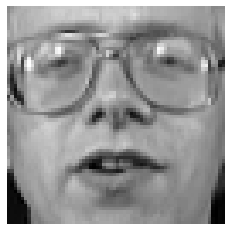

In [7]:
show_face(X[10])

## Questions and Code

**1. Randomly split `X` and `y` into 2 subsets for training (50%) and test (50%) so that the numbers of faces of each subject are the same in the training set and the test set. Use `random_state = 42`. [2 points]**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5, stratify=y)

In [9]:
print(np.shape(X_train), np.shape(X_test))
print(np.shape(y_train), np.shape(y_test))

(200, 4096) (200, 4096)
(200,) (200,)


In [10]:
training_labels = y_train.copy()
training_labels.sort()
training_labels  # There is five of each label in training set, and so there is also five of each label in test set

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20,
       20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23,
       23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27,
       27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30,
       30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
       34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37,
       37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39])

**2. Build the first face recoginition model by using the ``KNeighborsClassifier`` to find the best matching image in the training set of each of the images in the test set. Compute the test accuracy. [4 points]**

Document: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [11]:
## Train the model ##
knc = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [12]:
## Get the nearest training image for each of the test images ##
closestsIndex = knc.kneighbors(X=X_test, return_distance=False)
closestsClass = y_train[closestsIndex]

In [13]:
def get_errors(y, yp, labels=True, plot=True):
    print("Accuracy:", accuracy_score(y, yp)*100, "%")
    if plot:
        cm = confusion_matrix(y, yp)
        plt.matshow(cm, cmap=plt.cm.gray)
        if labels:
            plt.xlabel('Predictions', fontsize=18)
            plt.ylabel('Actuals', fontsize=18)
            plt.title('Confusion Matrix', fontsize=18)
        plt.show()

Accuracy: 87.5 %


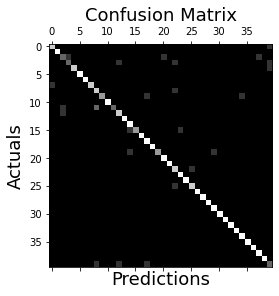

In [14]:
## Print accuracy and plot confusion matrix ##
get_errors(y_test, closestsClass)

**3. Build a PCA transformer using the training set so that the amount of variance explained by the selected components is greater than 95%. How many components are obtained? [3 points]**

Document: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [15]:
pcaTransformer = PCA(n_components=0.95).fit(X_train)
X_95p_train = pcaTransformer.transform(X_train)
X_95p_test = pcaTransformer.transform(X_test)
print(np.shape(X_95p_train), np.shape(X_95p_test))

(200, 85) (200, 85)


The number of components that make up 95% of the variance is 85, a vast improvement on 4096 dimensions.

**4. Re-train the ``KNeighborsClassifier`` in Question 2 with the data obtained after using the PCA transformer in Question 3. Test with the test set and report the test accuracy. [3 points]**

In [16]:
print(X_95p_train.shape, y_train.shape, "//", X_95p_test.shape, y_test.shape)

(200, 85) (200,) // (200, 85) (200,)


In [17]:
## Train the model ##
knc95p = KNeighborsClassifier().fit(X_95p_train, y_train)

In [18]:
## Get the nearest training image for each of the test images ##
closestsIndex95p = knc95p.kneighbors(X=X_95p_test, n_neighbors=1, return_distance=False)
closestsClass95p = y_train[closestsIndex95p]
closestsImage95p = X_train[closestsIndex95p]

Accuracy: 87.5 %


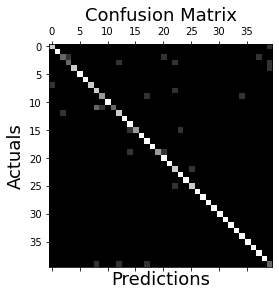

In [19]:
## Print accuracy and plot confusion matrix ##
get_errors(y_test, closestsClass95p)

**5. Display in two columns all the wrong predicted images in the test set together with the nearest image found in the training set. [3 points]**

Accuracy: 99.0 %


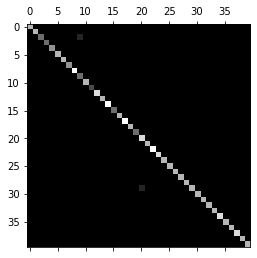

In [20]:
get_errors(closestsClass, closestsClass95p, labels=False)

The predictions from the transformed data are almost the same as the predictions from the original data.

In [21]:
def incorrect_index(y, yp):
    numOfIncorrect = int(np.around(((1-accuracy_score(y, yp))*len(y)), 0))  # Num of incorrect predictions
    indexes = np.zeros([numOfIncorrect]).astype(int)  # Array of indices of incorrect predictions

    ii = 0  # Num of incorrect predictions found
    for i in range(len(y)):
        if (y[i] != yp[i]):
            indexes[ii] = i  # Add to array
            ii = ii + 1
    return indexes

In [22]:
incorrectIndex = incorrect_index(y_test, closestsClass95p)

In [23]:
def show_two_faces(data1, data2):
    data = np.append(data1, data2)
    image = data.reshape(128, 64)
    plt.imshow(image, cmap = mpl.cm.gray, interpolation="nearest")
    plt.axis("off")

In [24]:
def show_pairs_of_faces(instances1, instances2, images_per_row=9, spacing=0.25, **options):
    join = join_pairs_of_faces(instances1, instances2, spacing+2)
    show_faces(join, images_per_row, multiplier=spacing+2, **options)

def show_faces(instances, images_per_row=9, multiplier=1, size=(18,15), **options):
    plt.figure(figsize = size)
    width = 64
    height = int(width*multiplier)
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(height, width) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((height, width * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.gray, **options)
    plt.axis("off")

def join_pairs_of_faces(f1, f2, m):
    if (len(f1.shape) == 1):
        return join_pair_of_faces(f1, f2, m-2)
    elif (len(f1.shape) == 2):
        pairedf = np.ones([len(f1), int(len(f1[0])*m)])
        for i in range(len(f1)):
            pairedf[i] = join_pair_of_faces(f1[i], f2[i], m-2)
        return pairedf
    return 0

def join_pair_of_faces(f1, f2, m):
    spacing1 = np.zeros((int(len(f1)*m*0.5)))
    spacing2 = np.zeros((int(len(f1)*m)-int(len(f1)*m*0.5)))
    return np.append(np.append(spacing1, f1), np.append(f2, spacing2))

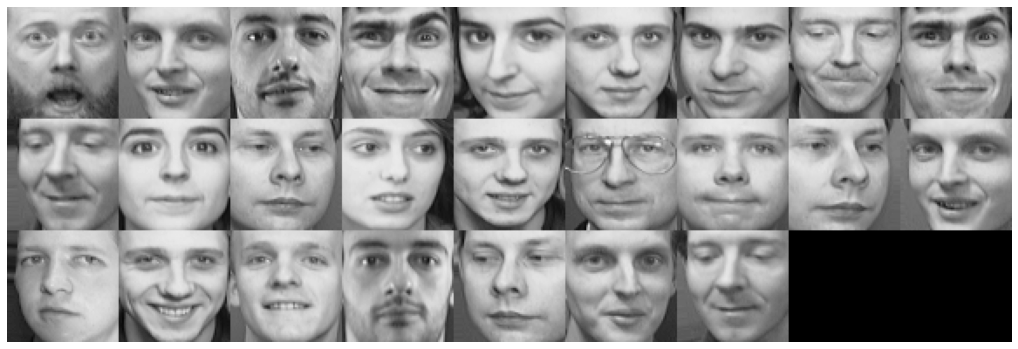

In [25]:
show_faces(X_test[incorrectIndex]) 
 ## Incorrectly identified faces ##

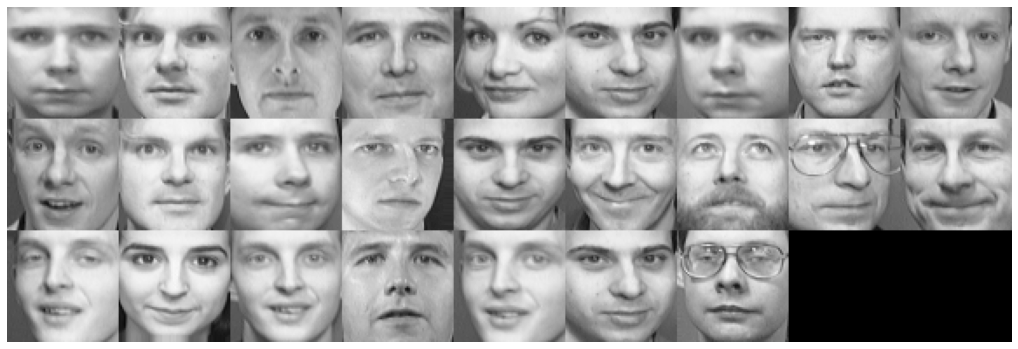

In [26]:
show_faces(closestsImage95p[incorrectIndex]) 
 ## Nearest neighbour for the incorrectly identified faces ##

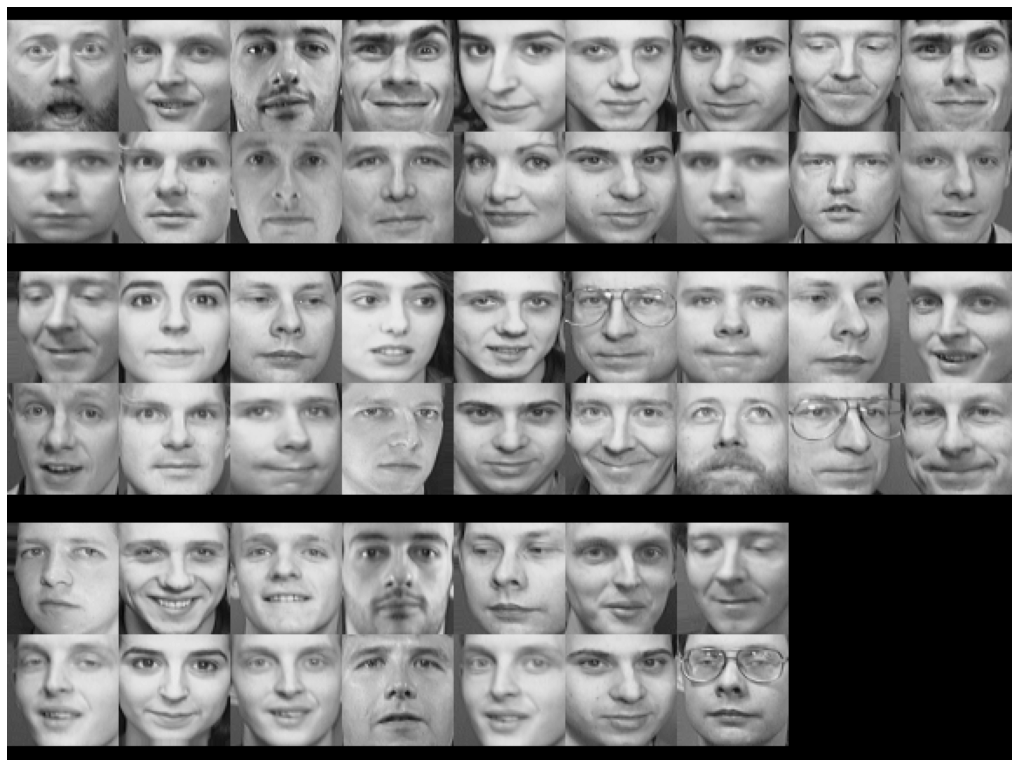

In [27]:
show_pairs_of_faces(X_test[incorrectIndex], closestsImage95p[incorrectIndex])
 ## Both faces have be paired, and are shown in rows ##

In [28]:
def merge_two_lists_of_faces(y, yp):
    merged = np.zeros([len(y)*2, len(y[0])])
    for i in range(len(y)):
        merged[2*i] = y[i]
        merged[2*i+1] = yp[i]

    return merged

def merge_three_lists_of_faces(y, yt, yp):
    merged = np.zeros([len(y)*3, len(y[0])])
    for i in range(len(y)):
        merged[3*i] = y[i]
        merged[3*i+1] = yt[i]
        merged[3*i+2] = yp[i]

    return merged

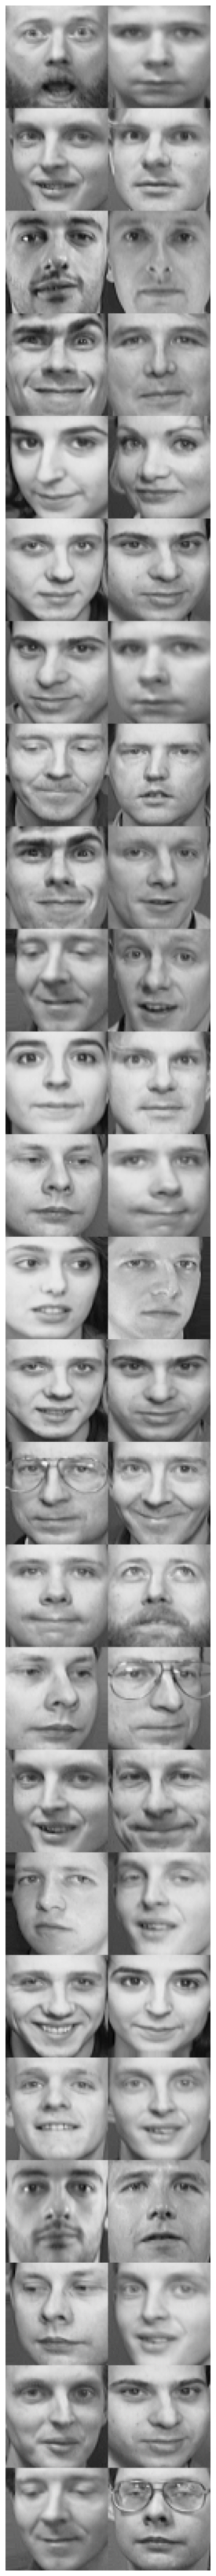

In [29]:
mergedList = merge_two_lists_of_faces(X_test[incorrectIndex], closestsImage95p[incorrectIndex])
show_faces(mergedList, images_per_row=2, size=(72,60))
## Faces have be paired, and are shown in columns ##

**6. Repeat Question 4 using another classifier of your choice which is tuned using `GridSearchCV` with 5-fold cross-validation. [5 points]**

(You are free to choose any classifier and its hyperparameters for tuning).

In [30]:
def get_more_errors(model, x, y, plot=True):
    get_errors(y, model.predict(x), plot=plot)
    get_cv(model, x, y)
    
def get_cv(model, x, y):
    cv_results = cross_validate(model, x, y, cv=5)
    scores = cv_results["test_score"]
    print("The mean cross-validation accuracy is: ", f"{scores.mean():.4f} +/- {scores.std():.4f}")

In [31]:
svc = SVC()
svc.fit(X_95p_train, y_train)

SVC()

Accuracy: 100.0 %


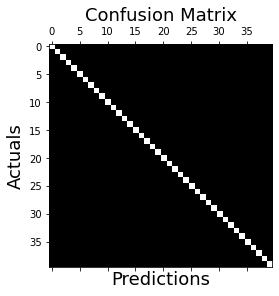

The mean cross-validation accuracy is:  0.8450 +/- 0.0534


In [32]:
get_more_errors(svc, X_95p_train, y_train)

Accuracy: 87.5 %


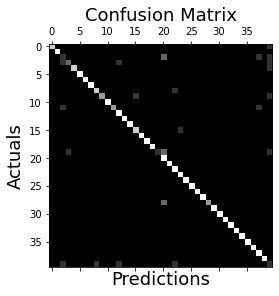

The mean cross-validation accuracy is:  0.8550 +/- 0.0332


In [33]:
get_more_errors(svc, X_95p_test, y_test)

The SVC model with the default hyperparameters has significant overfitting, so we should experiment with other parameters.

In [34]:
param_grid = [{'C': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
             'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 'scale', 'auto']}]

grid_search = GridSearchCV(svc, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)

In [35]:
grid_search.fit(X_95p_train, y_train)
score = np.around(grid_search.best_score_, decimals=3)
best_model = grid_search.best_estimator_
print("Best score:", 100*score, "% for", best_model)

Best score: 91.5 % for SVC(C=100, gamma=0.001)


Accuracy: 92.5 %


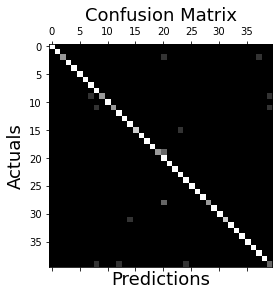

The mean cross-validation accuracy is:  0.8900 +/- 0.0339
Incorrectly classified faces:


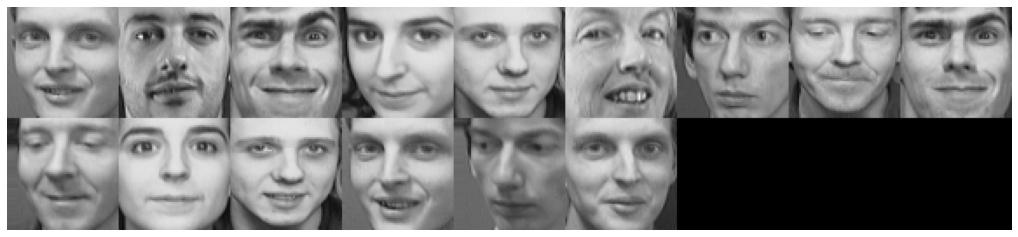

In [36]:
get_more_errors(best_model, X_95p_test, y_test)
print("Incorrectly classified faces:")
best_guess = best_model.predict(X_95p_test)
incorrectGridIndex = incorrect_index(y_test, best_guess)
show_faces(X_test[incorrectGridIndex])